In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Creating path
path= r'C:\Users\13472\Documents\Task 6'

In [4]:
#Importing cleaning dataset
df_cacao_cleaned = pd.read_csv(os.path.join(path,'02. Prepared Data','df_cacao_cleaned.csv' ),index_col = False)

In [5]:
df_cacao_cleaned.head()

,Unnamed: 0,Company_Name,Bar Origin,Ref,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Origin
0,0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


In [6]:
df_cacao_cleaned.shape

(1795, 9)

In [8]:
#Unnamed:0 column not needed, we are going to drop column
df_cacao_cleaned = df_cacao_cleaned.drop('Unnamed: 0', axis=1)

In [9]:
df_cacao_cleaned.shape

(1795, 8)

In [10]:
df_cacao_cleaned.describe()

,Ref,Review_Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [11]:
df_cacao_cleaned.head()

,Company_Name,Bar Origin,Ref,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


In [12]:
# Changing cocoa_percentage data type
df_cacao_cleaned['Cocoa_Percentage'] = df_cacao_cleaned['Cocoa_Percentage'].str.replace('%','').astype(float)/100

In [13]:
df_cacao_cleaned.head()

,Company_Name,Bar Origin,Ref,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru


# Correlations

In [14]:
#Create a correlation matrix heatmap (colored).
df_cacao_cleaned.corr()

C:\Users\13472\AppData\Local\Temp\ipykernel_10828\649920456.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cacao_cleaned.corr()


,Ref,Review_Date,Cocoa_Percentage,Rating
Ref,1.000000,0.985076,0.037791,0.101030
Review_Date,0.985076,1.000000,0.038177,0.099846
Cocoa_Percentage,0.037791,0.038177,1.000000,-0.164820
Rating,0.101030,0.099846,-0.164820,1.000000


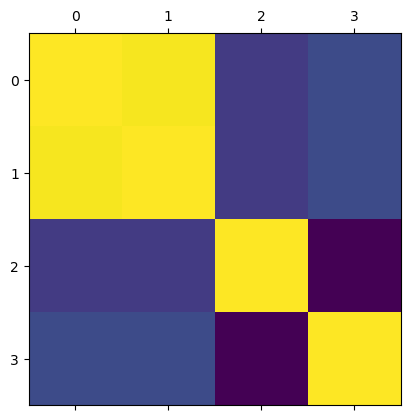

In [15]:
plt.matshow(df_cacao_cleaned.corr(numeric_only = True))
plt.show()

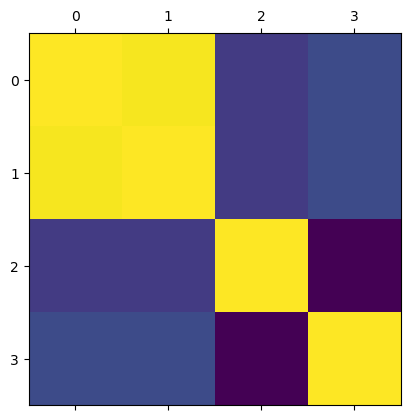

In [16]:
# Saving Figure
plt.matshow(df_cacao_cleaned.corr(numeric_only = True))
plt.savefig("correlation.png")

Text(0.5, 1.0, 'Correlation Matrix')

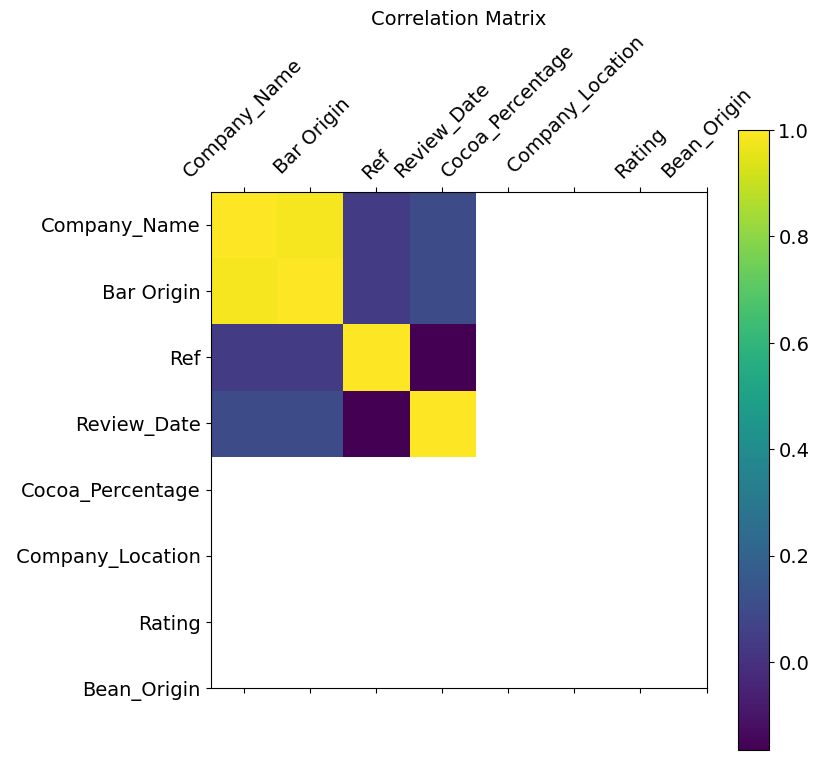

In [19]:
# Adding labels, legend and changing size of heatmap
f = plt.figure(figsize=(8, 8)) # figure size
plt.matshow(df_cacao_cleaned.corr(numeric_only = True), fignum=f.number) # type of plot
plt.xticks(range(df_cacao_cleaned.shape[1]), df_cacao_cleaned.columns, fontsize=14,rotation=45) # x axis labels
plt.yticks(range(df_cacao_cleaned.shape[1]), df_cacao_cleaned.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [20]:
df_cacao_cleaned.columns

Index(['Company_Name', ' Bar Origin', 'Ref', 'Review_Date', 'Cocoa_Percentage',
       ' Company_Location', 'Rating', 'Bean_Origin'],
      dtype='object')

In [21]:
# Creating a subset
Sub = df_cacao_cleaned[['Cocoa_Percentage','Rating']]

In [22]:
Sub

,Cocoa_Percentage,Rating
0,0.63,3.75
1,0.70,2.75
2,0.70,3.00
3,0.70,3.50
4,0.70,3.50
...,...,...
1790,0.70,3.75
1791,0.65,3.00
1792,0.65,3.50
1793,0.62,3.25


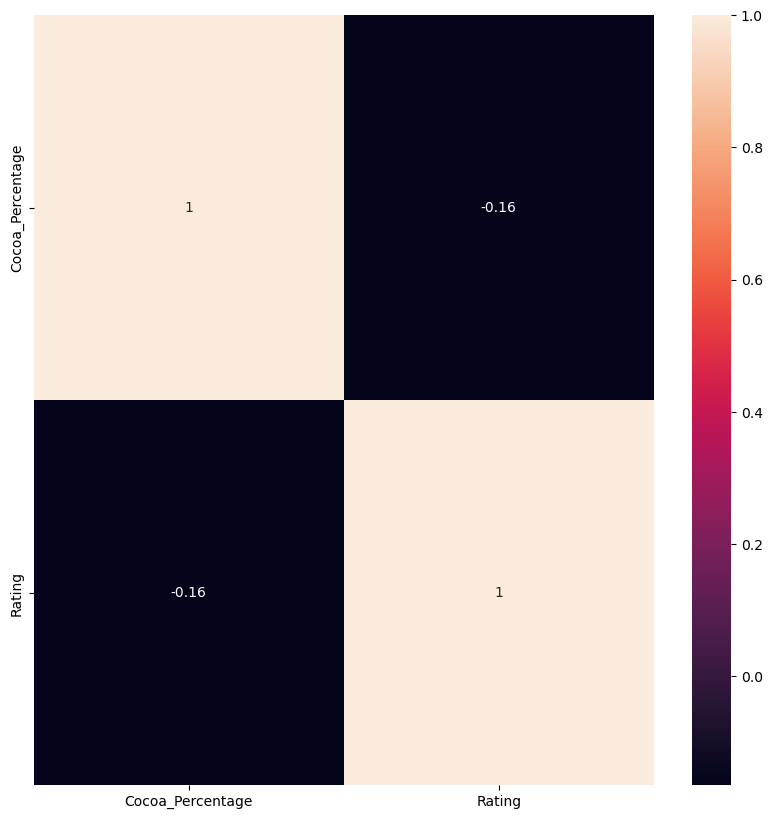

In [23]:
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
# Creating the correlation heatmap in seaborn
corr = sns.heatmap(Sub.corr(numeric_only = True), annot = True, ax = ax)

plt.savefig("heatmap_seaborn.png")

# Question 1: Does Cocoa Percentage have an affect on the ratings?

# Scatterplots

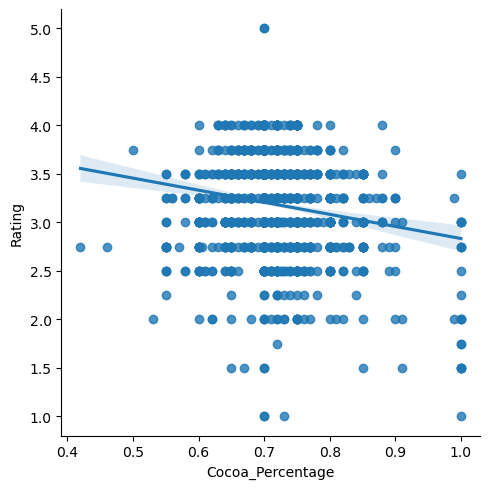

In [24]:
# Creating a scatterplot for 'Cocoa_Percenatage' and 'Rating' in seaborn
sns.lmplot(x = 'Cocoa_Percentage', y = 'Rating', data = df_cacao_cleaned)
plt.savefig("scatterplot.png")

There seems to be a slightly negative correlation between Cocoa_Percentage & Ratings. 

# Pair Plots

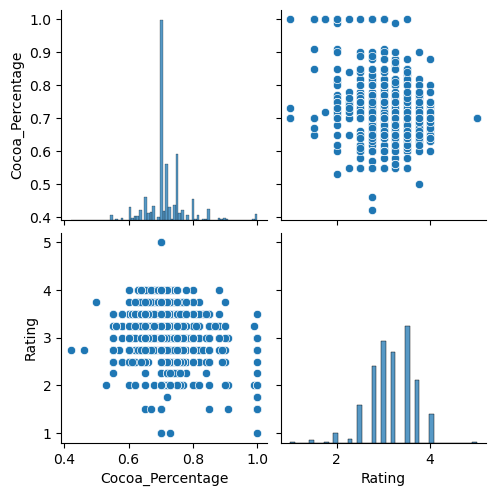

In [25]:
# Creating a Pair PLot

g = sns.pairplot(Sub)
plt.savefig("pairplot.png")

The pairplot gives a similar insight as the scatterplot

# Categorical Plots

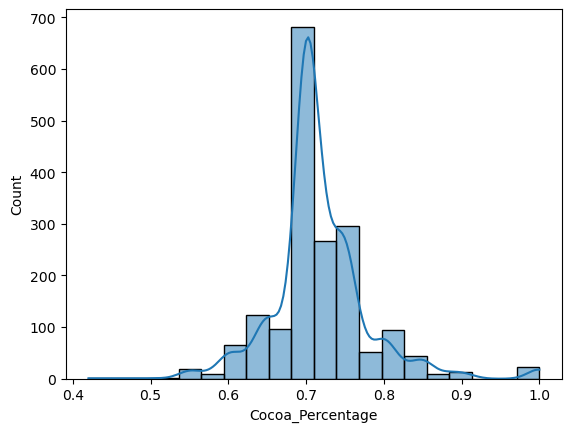

In [26]:
# Create a categorical plot
sns.histplot(df_cacao_cleaned['Cocoa_Percentage'], bins = 20, kde = True)
plt.savefig("CocoaPercen_hist.png") 

In [27]:
df_cacao_cleaned.loc[df_cacao_cleaned['Cocoa_Percentage'] < 0.5,'Cocoa Percent Category'] = 'Low Percent'

In [29]:
df_cacao_cleaned.loc[(df_cacao_cleaned['Cocoa_Percentage'] >=0.5) & (df_cacao_cleaned['Cocoa_Percentage'] < 0.8),'Cocoa Percent Category'] = 'Middle Percent'

In [30]:
df_cacao_cleaned.loc[df_cacao_cleaned['Cocoa_Percentage'] >= 0.8,'Cocoa Percent Category'] = 'High Percent'

In [31]:
df_cacao_cleaned['Cocoa Percent Category'].value_counts(dropna = False)

Middle Percent    1610
High Percent       183
Low Percent          2
Name: Cocoa Percent Category, dtype: int64

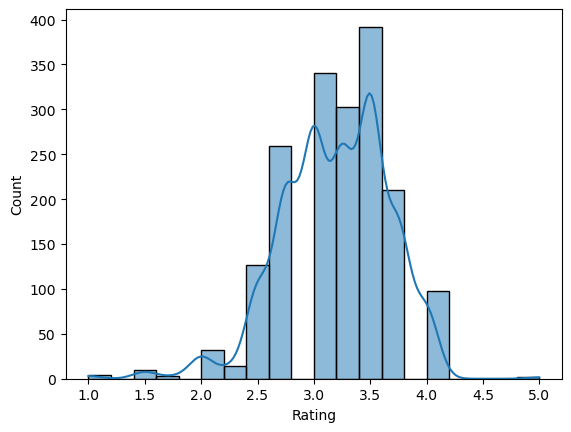

In [32]:
# Creating histogram for Rating
sns.histplot(df_cacao_cleaned['Rating'], bins = 20, kde = True)
plt.savefig("Rating_hist.png")

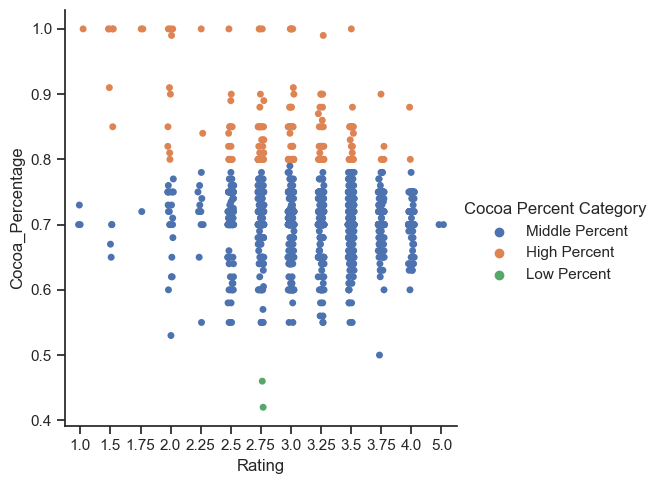

In [33]:
# Creating a categorical plot in seaborn using cocoa percentage categories
sns.set(style="ticks")
g= sns.catplot(x="Rating",y="Cocoa_Percentage",hue = "Cocoa Percent Category",data =df_cacao_cleaned)
plt.savefig("Categorical_Plot.png")

# Question 2: What are the top 5 countries that sell the most chocolate bars?


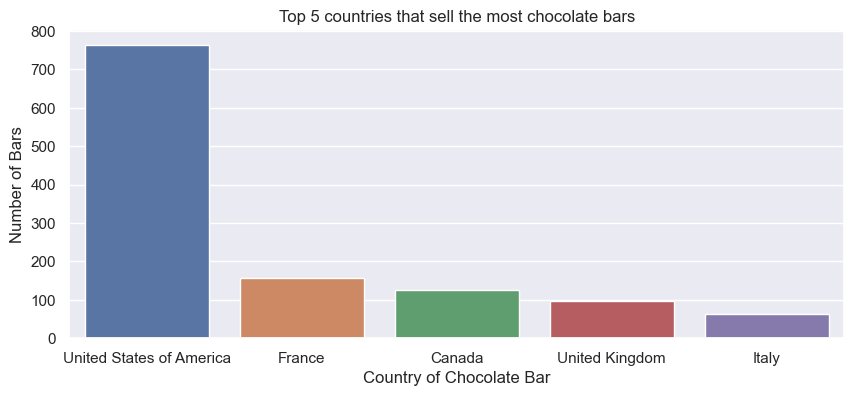

In [41]:
d = df_cacao_cleaned[' Company_Location'].value_counts().sort_values(ascending=False).head(5)
d = pd.DataFrame(d)
d = d.reset_index() # dataframe with top 5 companies

# Plotting
sns.set()
plt.figure(figsize=(10,4))
sns.barplot(x='index', y=' Company_Location', data=d)
plt.xlabel("Country of Chocolate Bar")
plt.ylabel("Number of Bars")
plt.title("Top 5 countries that sell the most chocolate bars")
plt.show() 

As you can see by the chart, United States sells the most chocolate bars.

# Question 3: What top 5 companies produce the most amount of chocolate bars?

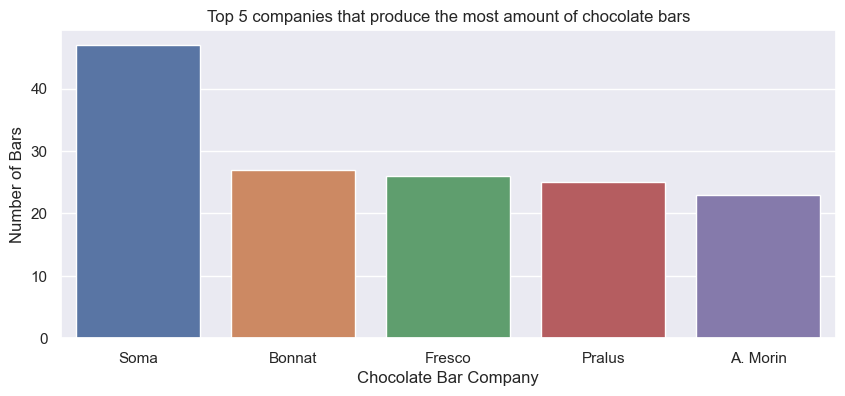

In [45]:
df = df_cacao_cleaned['Company_Name'].value_counts().sort_values(ascending=False).head(5)
df = pd.DataFrame(df)
df = df.reset_index() 

# Plotting
sns.set()
plt.figure(figsize=(10,4))
sns.barplot(x='index', y='Company_Name', data=df)
plt.xlabel('Chocolate Bar Company')
plt.ylabel('Number of Bars')
plt.title('Top 5 companies that produce the most amount of chocolate bars')
plt.show()

Soma is the company that produces the most chocolate bars